In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
pd.options.display.max_columns=1000
sns.set_theme()

In [3]:
df = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/df.csv')

In [4]:
df.head()

,set_num,set_name,year,theme_id,num_parts,set_num_len,set_name_len,theme_name,id,part_num,color_id,quantity,color_name,part_name,is_trans,theme_name_len,part_num_len,color_name_len,part_name_len,is_ninjago
0,001-1,Gears,1965,1,43,5,5,Technic,24696,132a,7,4,Light Gray,Tyre Smooth Old Style - Small,0,7,4,10,29,0
1,001-1,Gears,1965,1,43,5,5,Technic,24696,3020,15,4,White,Plate 2 x 4,0,7,4,5,11,0
2,001-1,Gears,1965,1,43,5,5,Technic,24696,3062c,15,1,White,"Brick Round 1 x 1 Solid Stud, No Bottom Groove",0,7,5,5,46,0
3,001-1,Gears,1965,1,43,5,5,Technic,24696,3404bc01,15,4,White,"Turntable 4 x 4 - Old Type Complete, Perfectly...",0,7,8,5,52,0
4,001-1,Gears,1965,1,43,5,5,Technic,24696,36,7,4,Light Gray,Tyre Smooth Old Style - Large,0,7,2,10,29,0


In [5]:
df.shape

(919288, 20)

In [6]:
df.columns

Index(['set_num', 'set_name', 'year', 'theme_id', 'num_parts', 'set_num_len',
       'set_name_len', 'theme_name', 'id', 'part_num', 'color_id', 'quantity',
       'color_name', 'part_name', 'is_trans', 'theme_name_len', 'part_num_len',
       'color_name_len', 'part_name_len', 'is_ninjago'],
      dtype='object')

In [7]:
target_names = 'set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()
target_names

['set_num',
 'set_name',
 'theme_id',
 'theme_name',
 'id',
 'part_num',
 'color_name',
 'part_name',
 'theme_name_len',
 'is_ninjago']

In [8]:
model = LogisticRegression()

In [9]:
fn_under = list()
for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn_under.append(name)

In [10]:
X = df[fn_under]
y = df['is_ninjago']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=1)

In [12]:
df_train = pd.concat([pd.DataFrame(X_train, columns=fn_under), pd.DataFrame(y_train, columns=['is_ninjago'])], axis=1)

In [13]:
df_test = pd.concat([pd.DataFrame(X_test, columns=fn_under), pd.DataFrame(y_test, columns=['is_ninjago'])], axis=1)

In [14]:
print(df_train.shape)
print(df_test.shape)

(827359, 11)
(91929, 11)


In [15]:
df_grouped_train = df_train.groupby('is_ninjago')

df_grouped_train.head()

,year,num_parts,set_num_len,set_name_len,color_id,quantity,is_trans,part_num_len,color_name_len,part_name_len,is_ninjago
774631,2014,368,7,19,15,1,0,11,5,59,0
417226,2013,284,7,16,0,1,0,5,5,45,0
414960,2010,631,6,20,0,1,0,5,5,57,0
896798,2008,842,6,33,0,2,0,4,5,12,0
591153,2007,974,6,19,70,3,0,6,13,53,0
555268,2016,754,7,17,2,3,0,4,5,11,1
575778,2015,361,7,15,19,1,0,5,3,27,1
576490,2015,2030,7,18,0,1,0,6,5,54,1
612760,2020,1017,7,23,27,8,0,4,4,33,1
567503,2019,364,7,11,0,2,0,5,5,43,1


In [16]:
print(df_grouped_train.size())

is_ninjago
0    795565
1     31794
dtype: int64


In [17]:
list(df_grouped_train)[0][1]

lengths = []

for is_ninjago, group in df_grouped_train:
    lengths.append(group.shape[0])
    
print(lengths)

[795565, 31794]


In [18]:
dfs_train = list()

for is_ninjago, group in df_grouped_train:
    dfs_train.append(group.sample(min(lengths)))
    
dfs_train

[        year  num_parts  set_num_len  set_name_len  color_id  quantity  \
 732356  2021        590            7            29        72         4   
 778246  2007        604            6            12       191         1   
 126987  2021       2164            7            19        10         6   
 245728  2015        334            7            20        31         2   
 45835   2021       2355            7            28         1         4   
 ...      ...        ...          ...           ...       ...       ...   
 53604   1985        785            6            54         1         2   
 269801  2017        326            7            25       322         4   
 227251  2020        134            7            10       320         2   
 878418  1991        900            6             9         4        14   
 523567  1992        406            6            17        34         2   
 
         is_trans  part_num_len  color_name_len  part_name_len  is_ninjago  
 732356         0    

In [19]:
df_balancedbyunder = pd.concat(dfs_train)
df_balancedbyunder.head()

,year,num_parts,set_num_len,set_name_len,color_id,quantity,is_trans,part_num_len,color_name_len,part_name_len,is_ninjago
732356,2021,590,7,29,72,4,0,4,16,11,0
778246,2007,604,6,12,191,1,0,5,19,39,0
126987,2021,2164,7,19,10,6,0,5,12,22,0
245728,2015,334,7,20,31,2,0,5,8,22,0
45835,2021,2355,7,28,1,4,0,4,4,28,0


In [20]:
df_balancedbyunder.shape

(63588, 11)

In [21]:
hyper_table_df_grouped = list()
fn_under = list()

for i, name in tqdm(enumerate(df_balancedbyunder.columns), total=len(df_balancedbyunder.columns)-1):
    if i > 100:
        break
    if name in target_names:
        continue
    fn_under.append(name)
    model.fit(df_balancedbyunder[fn_under], df_balancedbyunder['is_ninjago'])
    
    s_train = model.score(df_balancedbyunder[fn_under], df_balancedbyunder['is_ninjago'])
    s_test = model.score(df_test[fn_under], df_test['is_ninjago'])
    y_pred = model.predict(df_test[fn_under])

    conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)

    precision = precision_score(df_test['is_ninjago'], y_pred)
    recall = recall_score(df_test['is_ninjago'], y_pred)
    accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
    f1 = f1_score(df_test['is_ninjago'], y_pred)

    hyper_table_df_grouped.append(dict(sample='under', 
                        missing_feature=target_names[0], 
                        train_score=s_train, 
                        test_score=s_test,
                        precision=precision,
                        recall=recall,
                        accuracy=accuracy,
                        f1_score=f1,
                        model=model, 
                        num_features=df[fn_under].shape[1], 
                        num_rows_train=df_balancedbyunder.shape[0], 
                        num_rows_test=df_test.shape[0],
                        last_feature=fn_under[-1]))

 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:02<00:01,  2.48it/s]C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:03<00:00,  2.00it/s]C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

In [22]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)

In [23]:
fn_under = list()
for i, name in tqdm(enumerate(df_balancedbyunder.columns), total=len(df_balancedbyunder.columns)-1):
    if i > 100:
        break
    if name in target_names:
        continue
    fn_under.append(name)
    model_rf.fit(df_balancedbyunder[fn_under], df_balancedbyunder['is_ninjago'])
    
    s_train = model_rf.score(df_balancedbyunder[fn_under], df_balancedbyunder['is_ninjago'])
    s_test = model_rf.score(df_test[fn_under], df_test['is_ninjago'])
    y_pred = model_rf.predict(df_test[fn_under])

    conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)

    precision = precision_score(df_test['is_ninjago'], y_pred)
    recall = recall_score(df_test['is_ninjago'], y_pred)
    accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
    f1 = f1_score(df_test['is_ninjago'], y_pred)

    hyper_table_df_grouped.append(dict(sample='under', 
                        missing_feature=target_names[0], 
                        train_score=s_train, 
                        test_score=s_test,
                        precision=precision,
                        recall=recall,
                        accuracy=accuracy,
                        f1_score=f1,
                        model=model_rf, 
                        num_features=df[fn_under].shape[1], 
                        num_rows_train=df_balancedbyunder.shape[0], 
                        num_rows_test=df_test.shape[0], 
                        last_feature=fn_under[-1]))

11it [00:20,  1.87s/it]                                                                                                


In [24]:
ht_dfg_under = pd.DataFrame(hyper_table_df_grouped).sort_values('test_score', ascending=False)
ht_dfg_under

,sample,missing_feature,train_score,test_score,precision,recall,accuracy,f1_score,model,num_features,num_rows_train,num_rows_test,last_feature
13,under,set_num,0.999654,0.997552,0.942747,0.999456,0.997552,0.970273,"(DecisionTreeClassifier(max_features='auto', r...",4,63588,91929,set_name_len
14,under,set_num,0.999906,0.991929,0.833333,0.997550,0.991929,0.908077,"(DecisionTreeClassifier(max_features='auto', r...",5,63588,91929,color_id
12,under,set_num,0.994732,0.988241,0.772890,0.999456,0.988241,0.871691,"(DecisionTreeClassifier(max_features='auto', r...",3,63588,91929,set_num_len
11,under,set_num,0.991759,0.982845,0.700057,0.998639,0.982845,0.823107,"(DecisionTreeClassifier(max_features='auto', r...",2,63588,91929,num_parts
15,under,set_num,0.999953,0.982595,0.697674,0.996189,0.982595,0.820628,"(DecisionTreeClassifier(max_features='auto', r...",6,63588,91929,quantity
16,under,set_num,0.999953,0.973371,0.600856,0.994012,0.973371,0.748975,"(DecisionTreeClassifier(max_features='auto', r...",7,63588,91929,is_trans
18,under,set_num,0.999969,0.969879,0.570736,0.993740,0.969879,0.725052,"(DecisionTreeClassifier(max_features='auto', r...",9,63588,91929,color_name_len
17,under,set_num,0.999969,0.955672,0.473883,0.990201,0.955672,0.641001,"(DecisionTreeClassifier(max_features='auto', r...",8,63588,91929,part_num_len
19,under,set_num,1.000000,0.954704,0.468477,0.991018,0.954704,0.636205,"(DecisionTreeClassifier(max_features='auto', r...",10,63588,91929,part_name_len
1,under,set_num,0.546329,0.739310,0.056403,0.351116,0.739310,0.097193,LogisticRegression(),2,63588,91929,num_parts


10


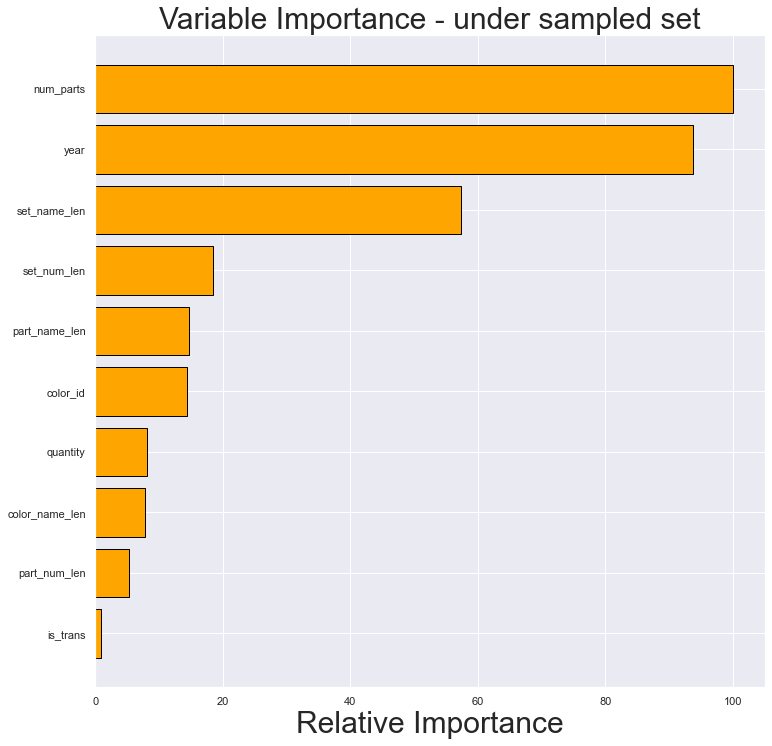

In [25]:
feature_importance = model_rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(12,12))
plt.barh(pos, feature_importance[sorted_idx], color='orange', edgecolor='black', align='center')
plt.yticks(pos, df_balancedbyunder[fn_under].columns[sorted_idx])
plt.xlabel('Relative Importance', fontsize=30)
plt.title('Variable Importance - under sampled set', fontsize=30)
plt.grid(True)
plt.show()

In [26]:
ht0 = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/ht0.csv')
ht_dfg_over = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/ht_dfg_over.csv')

In [27]:
hyper_table = pd.concat([ht0, ht_dfg_over, ht_dfg_under])

In [28]:
hyper_table = hyper_table.sort_values('test_score', ascending=False)
hyper_table

,sample,desc,train_score,test_score,model,precision,recall,accuracy,f1_score,num_features,num_rows_train,num_rows_test,last_feature,missing_feature
0,balanced,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999401,0.999347,"RandomForestClassifier(n_jobs=-1, random_state=1)",0.992639,0.991018,0.999347,0.991828,4,827359,91929,set_name_len,NaN
1,balanced,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999792,0.999162,"RandomForestClassifier(n_jobs=-1, random_state=1)",0.993687,0.985302,0.999162,0.989477,5,827359,91929,color_id,NaN
0,over,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999558,0.999064,"RandomForestClassifier(n_jobs=-1, random_state=1)",0.977636,0.999456,0.999064,0.988425,4,1591130,91929,set_name_len,NaN
1,over,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999791,0.998956,"RandomForestClassifier(n_jobs=-1, random_state=1)",0.985350,0.988568,0.998956,0.986957,5,1591130,91929,color_id,NaN
2,over,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999873,0.998521,"RandomForestClassifier(n_jobs=-1, random_state=1)",0.986791,0.976048,0.998521,0.981390,6,1591130,91929,quantity,NaN
2,balanced,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999861,0.998325,"RandomForestClassifier(n_jobs=-1, random_state=1)",0.992997,0.964888,0.998325,0.978741,6,827359,91929,quantity,NaN
3,over,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999873,0.997944,"RandomForestClassifier(n_jobs=-1, random_state=1)",0.984431,0.963800,0.997944,0.974006,7,1591130,91929,is_trans,NaN
13,under,NaN,0.999654,0.997552,"(DecisionTreeClassifier(max_features='auto', r...",0.942747,0.999456,0.997552,0.970273,4,63588,91929,set_name_len,set_num
3,balanced,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999861,0.997520,"RandomForestClassifier(n_jobs=-1, random_state=1)",0.993414,0.944203,0.997520,0.968183,7,827359,91929,is_trans,NaN
4,over,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999920,0.997378,"RandomForestClassifier(n_jobs=-1, random_state=1)",0.981757,0.952096,0.997378,0.966699,9,1591130,91929,color_name_len,NaN


In [29]:
ht_dfg_under.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/ht_dfg_under.csv', index=False)

In [30]:
hyper_table.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/hyper_table.csv', index=False)

In [31]:
hyper_table = list()

In [32]:
target_names = 'is_trans set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [33]:
model_rf = RandomForestClassifier(n_estimators=1, random_state = 1,n_jobs=-1)

In [34]:
model_rf.fit(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_train = model_rf.score(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_test = model_rf.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_rf.predict(df_test[fn])

conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)

precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1_0 = f1_score(df_test['is_ninjago'], y_pred)

hyper_table.append(dict(sample='under', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_0,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=df_balancedbyunder.shape[0], 
                    num_rows_test=df_test.shape[0], 
                    last_feature=fn[-1]))

In [35]:
target_names = 'part_num_len set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [36]:
model_rf.fit(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_train = model_rf.score(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_test = model_rf.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_rf.predict(df_test[fn])

conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)

precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1_1 = f1_score(df_test['is_ninjago'], y_pred)

hyper_table.append(dict(sample='under', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_1,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=df_balancedbyunder.shape[0], 
                    num_rows_test=df_test.shape[0], 
                    last_feature=fn[-1]))

In [37]:
target_names = 'set_num_len set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [38]:
model_rf.fit(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_train = model_rf.score(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_test = model_rf.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_rf.predict(df_test[fn])

conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)

precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1_2 = f1_score(df_test['is_ninjago'], y_pred)

hyper_table.append(dict(sample='under', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_2,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=df_balancedbyunder.shape[0], 
                    num_rows_test=df_test.shape[0],
                    last_feature=fn[-1]))

In [39]:
target_names = 'color_name_len set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [40]:
model_rf.fit(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_train = model_rf.score(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_test = model_rf.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_rf.predict(df_test[fn])

conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)

precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1_3 = f1_score(df_test['is_ninjago'], y_pred)

hyper_table.append(dict(sample='under', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_3,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=df_balancedbyunder.shape[0], 
                    num_rows_test=df_test.shape[0],
                    last_feature=fn[-1]))

In [41]:
target_names = 'quantity set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [42]:
model_rf.fit(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_train = model_rf.score(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_test = model_rf.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_rf.predict(df_test[fn])

conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)

precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1_4 = f1_score(df_test['is_ninjago'], y_pred)

hyper_table.append(dict(sample='under', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_4,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=df_balancedbyunder.shape[0], 
                    num_rows_test=df_test.shape[0], 
                    last_feature=fn[-1]))

In [43]:
target_names = 'color_id set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [44]:
model_rf.fit(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_train = model_rf.score(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_test = model_rf.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_rf.predict(df_test[fn])

conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)

precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1_5 = f1_score(df_test['is_ninjago'], y_pred)

hyper_table.append(dict(sample='under', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_5,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=df_balancedbyunder.shape[0], 
                    num_rows_test=df_test.shape[0], 
                    last_feature=fn[-1]))

In [45]:
target_names = 'part_name_len set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [46]:
model_rf.fit(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_train = model_rf.score(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_test = model_rf.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_rf.predict(df_test[fn])

conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)

precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1_6 = f1_score(df_test['is_ninjago'], y_pred)

hyper_table.append(dict(sample='under', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_6,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=df_balancedbyunder.shape[0], 
                    num_rows_test=df_test.shape[0], 
                    last_feature=fn[-1]))

In [47]:
target_names = 'year set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [48]:
model_rf.fit(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_train = model_rf.score(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_test = model_rf.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_rf.predict(df_test[fn])

conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)

precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1_7 = f1_score(df_test['is_ninjago'], y_pred)

hyper_table.append(dict(sample='under', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_7,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=df_balancedbyunder.shape[0], 
                    num_rows_test=df_test.shape[0], 
                    last_feature=fn[-1]))

In [49]:
target_names = 'set_name_len set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [50]:
model_rf.fit(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_train = model_rf.score(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_test = model_rf.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_rf.predict(df_test[fn])

conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)

precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1_8 = f1_score(df_test['is_ninjago'], y_pred)

hyper_table.append(dict(sample='under', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_8,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=df_balancedbyunder.shape[0], 
                    num_rows_test=df_test.shape[0], 
                    last_feature=fn[-1]))

In [51]:
target_names = 'num_parts set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [52]:
model_rf.fit(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_train = model_rf.score(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_test = model_rf.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_rf.predict(df_test[fn])

conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)

precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1_9 = f1_score(df_test['is_ninjago'], y_pred)

hyper_table.append(dict(sample='under', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_9,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=df_balancedbyunder.shape[0], 
                    num_rows_test=df_test.shape[0],
                    last_feature=fn[-1]))

In [53]:
ht = pd.DataFrame(hyper_table).sort_values('test_score', ascending=False)
ht

,sample,missing_feature,train_score,test_score,precision,recall,accuracy,f1_score,model,num_features,num_rows_train,num_rows_test,last_feature
3,under,color_name_len,0.981600,0.939312,0.394014,0.963800,0.939312,0.559356,"(DecisionTreeClassifier(max_features='auto', r...",9,63588,91929,part_name_len
4,under,quantity,0.980515,0.932905,0.369040,0.956451,0.932905,0.532586,"(DecisionTreeClassifier(max_features='auto', r...",9,63588,91929,part_name_len
5,under,color_id,0.978911,0.932252,0.366590,0.955090,0.932252,0.529820,"(DecisionTreeClassifier(max_features='auto', r...",9,63588,91929,part_name_len
6,under,part_name_len,0.978675,0.925595,0.345350,0.962167,0.925595,0.508267,"(DecisionTreeClassifier(max_features='auto', r...",9,63588,91929,color_name_len
2,under,set_num_len,0.968846,0.898878,0.274144,0.928688,0.898878,0.423325,"(DecisionTreeClassifier(max_features='auto', r...",9,63588,91929,part_name_len
1,under,part_num_len,0.967195,0.891264,0.259729,0.930049,0.891264,0.406061,"(DecisionTreeClassifier(max_features='auto', r...",9,63588,91929,part_name_len
0,under,is_trans,0.964018,0.888599,0.253657,0.920250,0.888599,0.397695,"(DecisionTreeClassifier(max_features='auto', r...",9,63588,91929,part_name_len
7,under,year,0.944565,0.834611,0.177825,0.866086,0.834611,0.295067,"(DecisionTreeClassifier(max_features='auto', r...",9,63588,91929,part_name_len
8,under,set_name_len,0.939800,0.818980,0.162616,0.850572,0.818980,0.273033,"(DecisionTreeClassifier(max_features='auto', r...",9,63588,91929,part_name_len
9,under,num_parts,0.925929,0.805241,0.147912,0.813555,0.805241,0.250314,"(DecisionTreeClassifier(max_features='auto', r...",9,63588,91929,part_name_len


In [54]:
ht['diff'] = ht['test_score'].diff()

In [55]:
ht.sort_values('diff')

,sample,missing_feature,train_score,test_score,precision,recall,accuracy,f1_score,model,num_features,num_rows_train,num_rows_test,last_feature,diff
7,under,year,0.944565,0.834611,0.177825,0.866086,0.834611,0.295067,"(DecisionTreeClassifier(max_features='auto', r...",9,63588,91929,part_name_len,-0.053987
2,under,set_num_len,0.968846,0.898878,0.274144,0.928688,0.898878,0.423325,"(DecisionTreeClassifier(max_features='auto', r...",9,63588,91929,part_name_len,-0.026716
8,under,set_name_len,0.939800,0.818980,0.162616,0.850572,0.818980,0.273033,"(DecisionTreeClassifier(max_features='auto', r...",9,63588,91929,part_name_len,-0.015632
9,under,num_parts,0.925929,0.805241,0.147912,0.813555,0.805241,0.250314,"(DecisionTreeClassifier(max_features='auto', r...",9,63588,91929,part_name_len,-0.013739
1,under,part_num_len,0.967195,0.891264,0.259729,0.930049,0.891264,0.406061,"(DecisionTreeClassifier(max_features='auto', r...",9,63588,91929,part_name_len,-0.007615
6,under,part_name_len,0.978675,0.925595,0.345350,0.962167,0.925595,0.508267,"(DecisionTreeClassifier(max_features='auto', r...",9,63588,91929,color_name_len,-0.006657
4,under,quantity,0.980515,0.932905,0.369040,0.956451,0.932905,0.532586,"(DecisionTreeClassifier(max_features='auto', r...",9,63588,91929,part_name_len,-0.006407
0,under,is_trans,0.964018,0.888599,0.253657,0.920250,0.888599,0.397695,"(DecisionTreeClassifier(max_features='auto', r...",9,63588,91929,part_name_len,-0.002665
5,under,color_id,0.978911,0.932252,0.366590,0.955090,0.932252,0.529820,"(DecisionTreeClassifier(max_features='auto', r...",9,63588,91929,part_name_len,-0.000653
3,under,color_name_len,0.981600,0.939312,0.394014,0.963800,0.939312,0.559356,"(DecisionTreeClassifier(max_features='auto', r...",9,63588,91929,part_name_len,NaN


In [56]:
hyper_table = list()

In [57]:
df.columns

Index(['set_num', 'set_name', 'year', 'theme_id', 'num_parts', 'set_num_len',
       'set_name_len', 'theme_name', 'id', 'part_num', 'color_id', 'quantity',
       'color_name', 'part_name', 'is_trans', 'theme_name_len', 'part_num_len',
       'color_name_len', 'part_name_len', 'is_ninjago'],
      dtype='object')

In [58]:
target_names = 'year num_parts set_name_len'.split()

In [59]:
fn = list()

for i, name in enumerate(target_names):
    fn.append(name)
    
fn

['year', 'num_parts', 'set_name_len']

In [60]:
model_rf.fit(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])

s_train = model_rf.score(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_test = model_rf.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_rf.predict(df_test[fn])

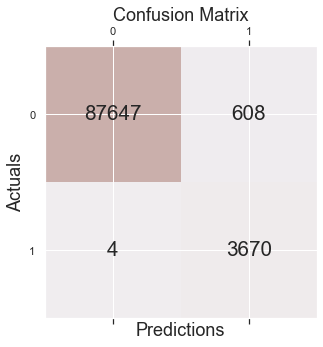

In [61]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [62]:
precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1 = f1_score(df_test['is_ninjago'], y_pred)

hyper_table.append(dict(sample='under', 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=df_balancedbyunder.shape[0], 
                    num_rows_test=df_test.shape[0])) 

In [63]:
ht_fr_under = pd.DataFrame(hyper_table)
ht_fr_under

,sample,train_score,test_score,precision,recall,accuracy,f1_score,model,num_features,num_rows_train,num_rows_test
0,under,0.998396,0.993343,0.857878,0.998911,0.993343,0.923038,"(DecisionTreeClassifier(max_features='auto', r...",3,63588,91929


In [64]:
ht_fr_under.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/ht_fr_under.csv', index=False)

In [65]:
ht_fr_bal = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/ht_fr_bal.csv')
ht_fr_over = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/ht_fr_over.csv')

In [66]:
hyper_table = pd.concat([ht_fr_bal, ht_fr_over, ht_fr_under])

In [67]:
hyper_table = hyper_table.sort_values('test_score', ascending=False)
hyper_table

,sample,train_score,test_score,precision,recall,accuracy,f1_score,model,num_features,num_rows_train,num_rows_test
0,balanced,0.998901,0.998716,0.970370,0.998367,0.998716,0.984170,RandomForestClassifier(class_weight='balanced'...,3,827359,91929
0,over,0.999403,0.998618,0.967079,0.999456,0.998618,0.983001,"RandomForestClassifier(n_estimators=1, n_jobs=...",3,1591130,91929
0,under,0.998396,0.993343,0.857878,0.998911,0.993343,0.923038,"(DecisionTreeClassifier(max_features='auto', r...",3,63588,91929


In [68]:
hyper_table.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/hyper_table_final.csv', index=False)